<a href="https://colab.research.google.com/github/Alex-Hoang666/AI/blob/main/AI_W9_31_3_23(cyfar10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 2s 0us/step


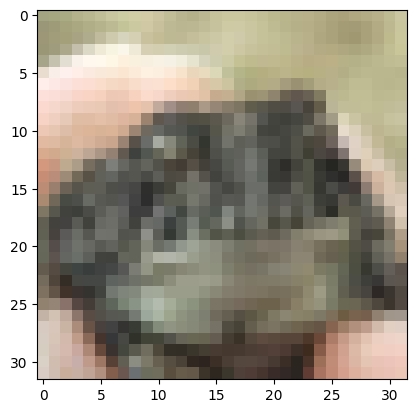

['hinh:', array([[[162, 164, 130],
        [164, 167, 128],
        [169, 171, 131],
        ...,
        [184, 176, 137],
        [190, 186, 146],
        [202, 198, 161]],

       [[153, 151, 119],
        [158, 156, 120],
        [164, 163, 124],
        ...,
        [178, 171, 131],
        [189, 184, 143],
        [201, 198, 158]],

       [[157, 151, 120],
        [161, 156, 121],
        [164, 160, 122],
        ...,
        [178, 170, 131],
        [190, 186, 142],
        [202, 199, 156]],

       ...,

       [[214, 205, 193],
        [213, 193, 181],
        [213, 185, 174],
        ...,
        [240, 207, 193],
        [241, 206, 194],
        [242, 209, 196]],

       [[218, 209, 198],
        [209, 188, 176],
        [208, 180, 169],
        ...,
        [232, 195, 182],
        [236, 196, 185],
        [239, 200, 187]],

       [[216, 204, 197],
        [207, 189, 178],
        [201, 174, 156],
        ...,
        [231, 192, 178],
        [233, 194, 181],
        [235, 

In [3]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
digit=x_train[25]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print((['hinh:',x_train[25]]))

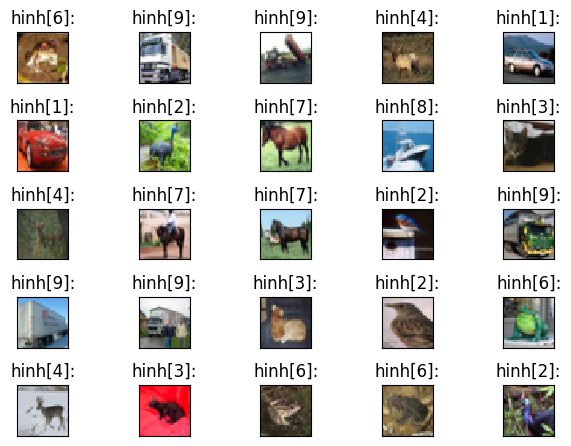

In [4]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('hinh{}:'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
#tạo mô hình
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50000)             153650000 
                                                                 
 dense_1 (Dense)             (None, 3000)              150003000 
                                                                 
 dense_2 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 10)                5010      
                                                                 
Total params: 307,159,510
Trainable params: 307,159,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [7]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
391/391 [==============================] - 2028s 5s/step - loss: 3.2328 - accuracy: 0.2057
Epoch 2/10
391/391 [==============================] - 2153s 6s/step - loss: 1.8950 - accuracy: 0.3115
Epoch 3/10
391/391 [==============================] - 2144s 5s/step - loss: 1.7907 - accuracy: 0.3525
Epoch 4/10
391/391 [==============================] - 2158s 6s/step - loss: 1.7186 - accuracy: 0.3797
Epoch 5/10
391/391 [==============================] - 2151s 6s/step - loss: 1.6588 - accuracy: 0.4038
Epoch 6/10
391/391 [==============================] - 2117s 5s/step - loss: 1.6117 - accuracy: 0.4217
Epoch 7/10
391/391 [==============================] - 2128s 5s/step - loss: 1.5691 - accuracy: 0.4386
Epoch 8/10
391/391 [==============================] - 2154s 6s/step - loss: 1.5326 - accuracy: 0.4513
Epoch 9/10
391/391 [==============================] - 2167s 6s/step - loss: 1.4938 - accuracy: 0.4657
Epoch 10/10
313/313 [==============================] - 106s 338ms/step - loss: 1.4

In [ ]:
model.save('test1.h5')


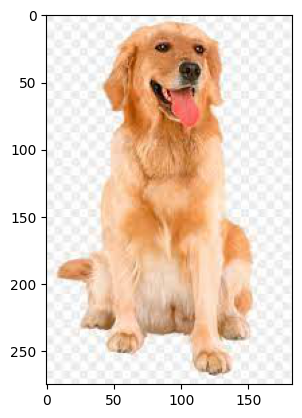

In [8]:
img = plt.imread('/content/drive/MyDrive/con_meo.jpg')
plt.imshow(img)

1/1 [==============================] - 0s 322ms/step


array([6])

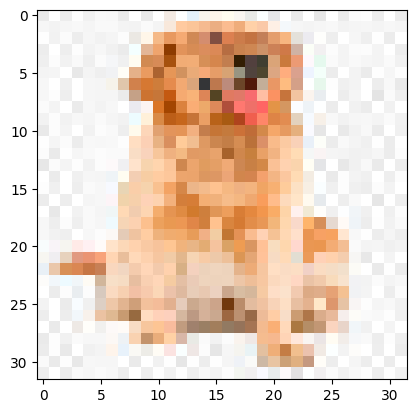

In [9]:
import numpy as np
from keras.utils import load_img, img_to_array
img=load_img('/content/drive/MyDrive/con_meo.jpg', target_size=(32,32)) #filename
plt.imshow(img)
img=img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis =1)